# Usage: policy measures
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.15.0'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

196

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **19th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{2: ['Holy See'],
 3: ['Laos', 'Timor-Leste', 'Fiji', 'Saint Kitts and Nevis'],
 4: ['Tanzania', 'Grenada', 'Dominica'],
 6: ['Equatorial Guinea', 'Saint Vincent and the Grenadines'],
 7: ['Northern Mariana Islands', 'Brunei'],
 8: ['Bahamas', 'Cambodia', 'Kyrgyzstan', 'Seychelles', 'Liechtenstein',
     'Mauritius', 'Saint Lucia'],
 9: ['Madagascar', 'Ethiopia', 'Republic of the Congo', 'Antigua and Barbuda',
     'Australia', 'Guam', 'Botswana', 'Papua New Guinea', 'Uzbekistan',
     'Trinidad and Tobago', 'Guyana'],
 10: ['Maldives', 'Nicaragua', 'Algeria', 'Venezuela', 'Belize',
      'Sao Tome and Principe', 'Bhutan', 'Iceland', 'Iraq', 'Philippines',
      'Djibouti', 'Vietnam', 'Kenya', 'Jamaica', 'Barbados', 'Libya', 'India',
      'Kazakhstan', 'Oman', 'Zimbabwe', 'Angola'],
 11: ['South Africa', 'Paraguay', 'Honduras', 'Chile', 'Peru', 'Costa Rica',
      'Saudi Arabia', 'Virgin Islands, U.S.', 'Singapore', 'Bangladesh',
      'Ghana', 'Argentina', 'Colombia', 'Bahrain', 'Cap

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=19)
# The number of countries
len(analyser.countries)

3

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{19: ['Switzerland', 'Sweden'], 20: ['Germany']}


In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Germany 0th    Past  18Jan2020  23Mar2020    82905782
        1st    Past  24Mar2020  06Apr2020    82905782
        2nd    Past  07Apr2020  05May2020    82905782
        3rd    Past  06May2020  04Aug2020    82905782
        4th    Past  05Aug2020  12Sep2020    82905782
        5th    Past  13Sep2020  07Oct2020    82905782
        6th    Past  08Oct2020  20Oct2020    82905782
        7th    Past  21Oct2020  27Oct2020    82905782
        8th    Past  28Oct2020  03Nov2020    82905782
        9th    Past  04Nov2020  10Nov2020    82905782
        10th   Past  11Nov2020  17Nov2020    82905782
        11th   Past  18Nov2020  24Nov2020    82905782
        12th   Past  25Nov2020  01Dec2020    82905782
        13th   Past  02Dec2020  08Dec2020    82905782
        14th   Past  09Dec2020  15Dec2020    82905782
        15th   Past  16Dec2020  21Dec2020    82905782
        16th   Past  22Dec2020  28Dec2020    82905782
        17th   Past  29Dec2020  04Jan2021    82905782
        18th   Past  05Jan2021  10Jan2021    82905782
        19th   Past  11Jan2021  17Jan2021    82905782

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF, timeout=10)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	DEU,  0th phase (18Jan2020 - 23Mar2020): finished  320 trials in 0 min 10 sec

	CHE, 12th phase (01Dec2020 - 07Dec2020): finished  336 trials in 0 min 10 sec

	SWE, 17th phase (04Jan2021 - 09Jan2021): finished  341 trials in 0 min 10 sec

	CHE,  6th phase (15Oct2020 - 20Oct2020): finished  342 trials in 0 min 10 sec

	DEU,  3rd phase (06May2020 - 04Aug2020): finished  317 trials in 0 min 10 sec

	SWE,  0th phase (20Feb2020 - 15Apr2020): finished  336 trials in 0 min 10 sec

	SWE, 14th phase (16Dec2020 - 21Dec2020): finished  345 trials in 0 min 10 sec

	CHE,  1st phase (23Mar2020 - 06Apr2020): finished  337 trials in 0 min 10 sec

	DEU,  7th phase (21Oct2020 - 27Oct2020): finished  346 trials in 0 min 10 sec

	CHE,  7th phase (21Oct2020 - 26Oct2020): finished  344 trials in 0 min 10 sec

	CHE, 11th phase (24Nov2020 - 30Nov2020): finished  345 trials in 0 min 10 sec

	CHE,  8th phase (27Oct2020 - 05Nov2020): finished  342 trials in 0 min 10 sec

	CHE, 10th phase (17Nov2020 - 23Nov2020): finished  345 trials in 0 min 10 sec

	CHE,  5th phase (06Oct2020 - 14Oct2020): finished  342 trials in 0 min 10 sec

	CHE,  0th phase (03Mar2020 - 22Mar2020): finished  338 trials in 0 min 10 sec

	SWE,  5th phase (13Aug2020 - 04Oct2020): finished  328 trials in 0 min 10 sec

	SWE,  3rd phase (08Jun2020 - 24Jun2020): finished  341 trials in 0 min 10 sec

	CHE, 14th phase (14Dec2020 - 20Dec2020): finished  346 trials in 0 min 10 sec

	CHE,  2nd phase (07Apr2020 - 02Aug2020): finished  308 trials in 0 min 10 sec

	DEU,  6th phase (08Oct2020 - 20Oct2020): finished  342 trials in 0 min 10 sec

	DEU,  4th phase (05Aug2020 - 12Sep2020): finished  335 trials in 0 min 10 sec

	DEU, 18th phase (05Jan2021 - 10Jan2021): finished  346 trials in 0 min 10 sec

	DEU,  1st phase (24Mar2020 - 06Apr2020): finished  335 trials in 0 min 10 sec

	SWE, 12th phase (02Dec2020 - 08Dec2020): finished  343 trials in 0 min 10 sec

	SWE,  8th phase (04Nov2020 - 10Nov2020): finished  346 trials in 0 min 10 sec

	DEU,  2nd phase (07Apr2020 - 05May2020): finished  337 trials in 0 min 10 sec

	CHE, 16th phase (28Dec2020 - 02Jan2021): finished  345 trials in 0 min 10 sec

	SWE,  4th phase (25Jun2020 - 12Aug2020): finished  329 trials in 0 min 10 sec

	DEU,  8th phase (28Oct2020 - 03Nov2020): finished  344 trials in 0 min 10 sec

	CHE, 18th phase (10Jan2021 - 17Jan2021): finished  338 trials in 0 min 10 sec

	CHE,  4th phase (08Sep2020 - 05Oct2020): finished  329 trials in 0 min 10 sec

	CHE, 13th phase (08Dec2020 - 13Dec2020): finished  342 trials in 0 min 10 sec

	DEU, 17th phase (29Dec2020 - 04Jan2021): finished  341 trials in 0 min 10 sec

	SWE, 10th phase (18Nov2020 - 24Nov2020): finished  341 trials in 0 min 10 sec

	SWE, 11th phase (25Nov2020 - 01Dec2020): finished  345 trials in 0 min 10 sec

	SWE,  7th phase (27Oct2020 - 03Nov2020): finished  339 trials in 0 min 10 sec

	SWE, 15th phase (22Dec2020 - 28Dec2020): finished  346 trials in 0 min 10 sec

	SWE,  9th phase (11Nov2020 - 17Nov2020): finished  346 trials in 0 min 10 sec

	SWE,  6th phase (05Oct2020 - 26Oct2020): finished  337 trials in 0 min 10 sec

	CHE, 17th phase (03Jan2021 - 09Jan2021): finished  342 trials in 0 min 10 sec

	DEU,  5th phase (13Sep2020 - 07Oct2020): finished  327 trials in 0 min 10 sec

	CHE,  3rd phase (03Aug2020 - 07Sep2020): finished  319 trials in 0 min 10 sec

	SWE,  2nd phase (13May2020 - 07Jun2020): finished  323 trials in 0 min 10 sec

	SWE,  1st phase (16Apr2020 - 12May2020): finished  319 trials in 0 min 10 sec

	DEU, 19th phase (11Jan2021 - 17Jan2021): finished  338 trials in 0 min 10 sec

	SWE, 13th phase (09Dec2020 - 15Dec2020): finished  346 trials in 0 min 10 sec

	SWE, 16th phase (29Dec2020 - 03Jan2021): finished  345 trials in 0 min 10 sec

	CHE, 15th phase (21Dec2020 - 27Dec2020): finished  341 trials in 0 min 10 sec

	CHE,  9th phase (06Nov2020 - 16Nov2020): finished  374 trials in 0 min 10 sec

Completed optimization. Total: 2 min 19 sec


In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE    Rt     theta  \
Country Phase                                                                  
Germany 0th    Past  18Jan2020  23Mar2020    82905782  SIR-F  3.15  0.000066   
        1st    Past  24Mar2020  06Apr2020    82905782  SIR-F  3.32  0.052979   
        2nd    Past  07Apr2020  05May2020    82905782  SIR-F  0.51  0.000182   
        3rd    Past  06May2020  04Aug2020    82905782  SIR-F  0.79  0.000131   
        4th    Past  05Aug2020  12Sep2020    82905782  SIR-F  1.39  0.000066   
        5th    Past  13Sep2020  07Oct2020    82905782  SIR-F  1.42  0.000130   
        6th    Past  08Oct2020  20Oct2020    82905782  SIR-F  2.98  0.000571   
        7th    Past  21Oct2020  27Oct2020    82905782  SIR-F  2.81  0.002290   
        8th    Past  28Oct2020  03Nov2020    82905782  SIR-F  2.30  0.000256   
        9th    Past  04Nov2020  10Nov2020    82905782      -     -         -   
        10th   Past  11Nov2020  17Nov2020    82905782      -     -         -   
        11th   Past  18Nov2020  24Nov2020    82905782      -     -         -   
        12th   Past  25Nov2020  01Dec2020    82905782      -     -         -   
        13th   Past  02Dec2020  08Dec2020    82905782      -     -         -   
        14th   Past  09Dec2020  15Dec2020    82905782      -     -         -   
        15th   Past  16Dec2020  21Dec2020    82905782      -     -         -   
        16th   Past  22Dec2020  28Dec2020    82905782      -     -         -   
        17th   Past  29Dec2020  04Jan2021    82905782  SIR-F  0.57  0.020084   
        18th   Past  05Jan2021  10Jan2021    82905782  SIR-F  0.93  0.000124   
        19th   Past  11Jan2021  17Jan2021    82905782  SIR-F  0.93  0.000130   

                  kappa       rho     sigma    tau 1/beta [day] alpha1 [-]  \
Country Phase                                                                
Germany 0th    0.000152  0.016824  0.005187  360.0         14.0      0.000   
        1st    0.000289  0.022227  0.006042  360.0         11.0      0.053   
        2nd    0.000837  0.011075  0.021050  360.0         22.0      0.000   
        3rd    0.000168  0.014751  0.018569  360.0         16.0      0.000   
        4th    0.000152  0.019316  0.013744  360.0         12.0      0.000   
        5th    0.000168  0.020982  0.014593  360.0         11.0      0.000   
        6th    0.000426  0.026687  0.008511  360.0          9.0      0.001   
        7th    0.000381  0.025855  0.008812  360.0          9.0      0.002   
        8th    0.000257  0.020358  0.008591  360.0         12.0      0.000   
        9th           -         -         -      -            -          -   
        10th          -         -         -      -            -          -   
        11th          -         -         -      -            -          -   
        12th          -         -         -      -            -          -   
        13th          -         -         -      -            -          -   
        14th          -         -         -      -            -          -   
        15th          -         -         -      -            -          -   
        16th          -         -         -      -            -          -   
        17th   0.000070  0.012320  0.021237  360.0         20.0      0.020   
        18th   0.000228  0.019760  0.020944  360.0         12.0      0.000   
        19th   0.000168  0.018076  0.019337  360.0         13.0      0.000   

              1/alpha2 [day] 1/gamma [day]     RMSLE Trials       Runtime  
Country Phase                                                              
Germany 0th           1649.0          48.0  1.486768  320.0  0 min 10 sec  
        1st            864.0          41.0  0.170072  335.0  0 min 10 sec  
        2nd            298.0          11.0  0.063893  337.0  0 min 10 sec  
        3rd           1486.0          13.0  0.237954  317.0  0 min 10 sec  
        4th           1647.0          18.0  0.071951  335.0  0 min 10 sec  
     

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-03,Switzerland,0.016724,0.000199,0.048146,0.000218,0.017,1253,5,1144,...,2,1,0,0,0,0,2,2,1,25.0
1,2020-03-03,Switzerland,0.016724,0.000199,0.048146,0.000218,0.017,1253,5,1144,...,2,1,0,0,0,0,2,2,1,25.0
2,2020-03-03,Switzerland,0.016724,0.000199,0.048146,0.000218,0.017,1253,5,1144,...,2,1,0,0,0,0,2,2,1,25.0
3,2020-03-03,Switzerland,0.016724,0.000199,0.048146,0.000218,0.017,1253,5,1144,...,2,1,0,0,0,0,2,2,1,25.0
4,2020-03-03,Switzerland,0.016724,0.000199,0.048146,0.000218,0.017,1253,5,1144,...,2,1,0,0,0,0,2,2,1,25.0


### $Rt$: Reprodcution number $\mathrm{[-]}$

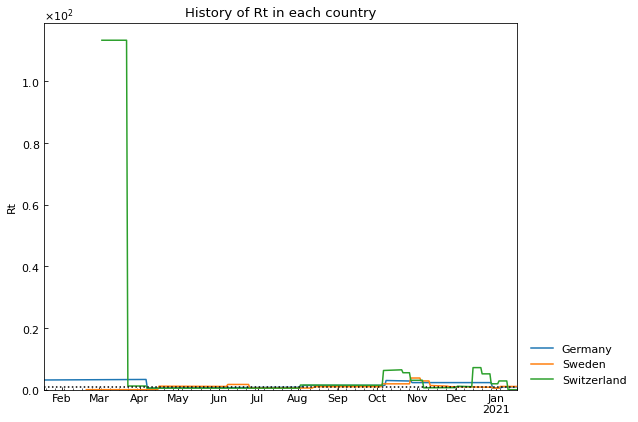

Country,Germany,Sweden,Switzerland
Date,,,
2021-01-13,0.93,1.05,0.0
2021-01-14,0.93,1.05,0.0
2021-01-15,0.93,1.05,0.0
2021-01-16,0.93,1.05,0.0
2021-01-17,0.93,1.05,0.0


In [14]:
analyser.history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

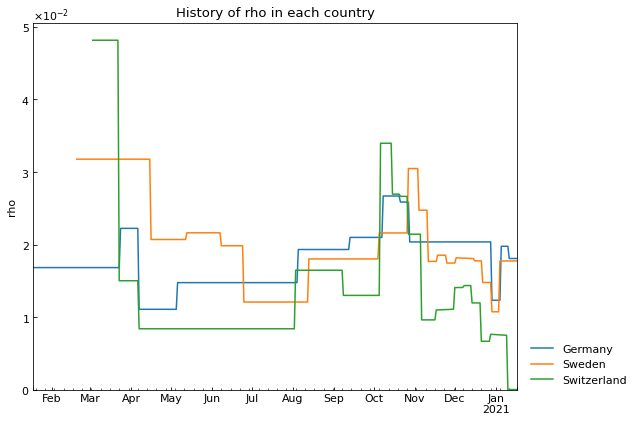

Country,Germany,Sweden,Switzerland
Date,,,
2021-01-13,0.018076,0.017737,0.000018
2021-01-14,0.018076,0.017737,0.000018
2021-01-15,0.018076,0.017737,0.000018
2021-01-16,0.018076,0.017737,0.000018
2021-01-17,0.018076,0.017737,0.000018


In [15]:
analyser.history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

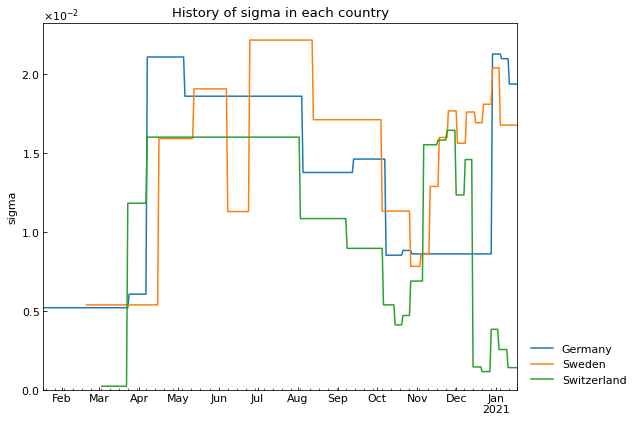

Country,Germany,Sweden,Switzerland
Date,,,
2021-01-13,0.019337,0.016741,0.001396
2021-01-14,0.019337,0.016741,0.001396
2021-01-15,0.019337,0.016741,0.001396
2021-01-16,0.019337,0.016741,0.001396
2021-01-17,0.019337,0.016741,0.001396


In [16]:
analyser.history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

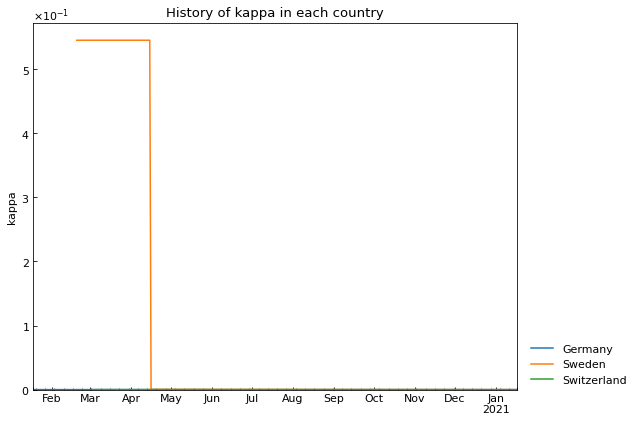

Country,Germany,Sweden,Switzerland
Date,,,
2021-01-13,0.000168,0.000071,0.000041
2021-01-14,0.000168,0.000071,0.000041
2021-01-15,0.000168,0.000071,0.000041
2021-01-16,0.000168,0.000071,0.000041
2021-01-17,0.000168,0.000071,0.000041


In [17]:
analyser.history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

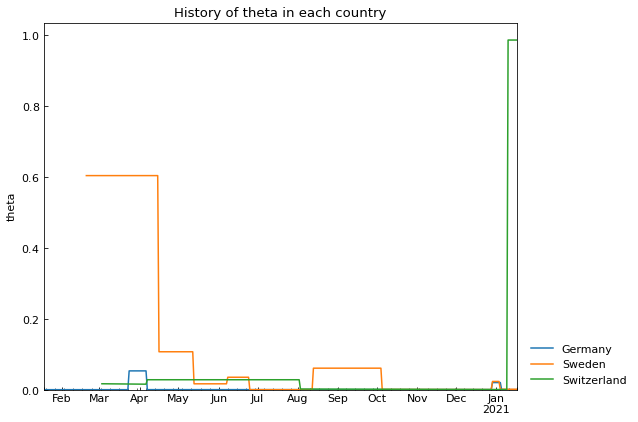

Country,Germany,Sweden,Switzerland
Date,,,
2021-01-13,0.00013,0.001303,0.984434
2021-01-14,0.00013,0.001303,0.984434
2021-01-15,0.00013,0.001303,0.984434
2021-01-16,0.00013,0.001303,0.984434
2021-01-17,0.00013,0.001303,0.984434


In [18]:
analyser.history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18177 entries, 0 to 18204
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 18177 non-null  datetime64[ns]
 1   Country                              18177 non-null  object        
 2   Rt                                   18177 non-null  float64       
 3   theta                                18177 non-null  float64       
 4   kappa                                18177 non-null  float64       
 5   rho                                  18177 non-null  float64       
 6   sigma                                18177 non-null  float64       
 7   School_closing                       18177 non-null  int64         
 8   Workplace_closing                    18177 non-null  int64         
 9   Cancel_events                        18177 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.046996,-0.044588,0.671582,-0.407549,-0.202072,-0.186611,-0.050687,-0.167851,-0.095275,-0.329673,-0.321439,-0.309028,-0.069314,-0.217876,-0.212909,-0.182042
theta,-0.046996,1.000000,0.678297,0.054793,-0.272748,-0.092075,-0.145700,-0.123449,-0.050918,0.006016,-0.163517,-0.215128,-0.158729,-0.138989,-0.199220,0.026705,-0.098249
kappa,-0.044588,0.678297,1.000000,0.317894,-0.211667,-0.165548,-0.260656,-0.232704,-0.165739,0.019585,-0.267204,-0.346635,-0.275064,-0.243136,-0.228904,-0.001494,-0.209037
rho,0.671582,0.054793,0.317894,1.000000,-0.466823,-0.393586,-0.295920,-0.151347,-0.222576,0.132914,-0.304917,-0.353965,-0.352912,-0.152491,-0.173360,-0.182508,-0.247585
sigma,-0.407549,-0.272748,-0.211667,-0.466823,1.000000,0.270673,0.323452,0.350127,0.395132,0.281290,0.390138,0.424256,0.457182,0.289554,0.295233,-0.093148,0.449779
School_closing,-0.202072,-0.092075,-0.165548,-0.393586,0.270673,1.000000,0.374156,0.529944,0.086669,-0.112810,0.574673,0.572817,0.587369,0.443360,0.150880,0.173335,0.409513
Workplace_closing,-0.186611,-0.145700,-0.260656,-0.295920,0.323452,0.374156,1.000000,0.520432,0.823044,-0.027758,0.614938,0.569288,0.592359,0.438263,0.258805,0.148825,0.802698
Cancel_events,-0.050687,-0.123449,-0.232704,-0.151347,0.350127,0.529944,0.520432,1.000000,0.540727,0.139721,0.636848,0.683562,0.810421,0.868206,0.509679,0.282087,0.706121
Gatherings_restrictions,-0.167851,-0.050918,-0.165739,-0.222576,0.395132,0.086669,0.823044,0.540727,1.000000,0.171745,0.485599,0.496930,0.583785,0.452199,0.202500,0.005213,0.847482
Transport_closing,-0.095275,0.006016,0.019585,0.132914,0.281290,-0.112810,-0.027758,0.139721,0.171745,1.000000,0.303762,0.100022,0.120016,0.113635,-0.036010,-0.338771,0.330770


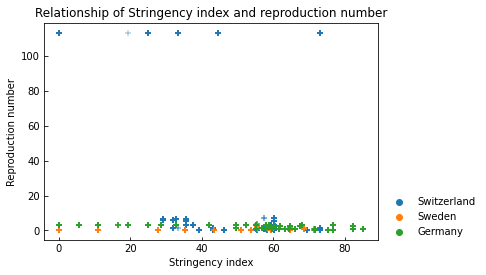

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()